# 48 Georeferencing Rasters using Rasterio in GemGIS

Rasters with no spatial reference can be georeferenced so that they are located properly in space. This can be done using rasterio.

<img src="../images/tutorial48_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/48_georeferencing_rasters_using_rasterio/'

## Loading Data

In order to demonstrate the capabilities of rasterio in georeferencing rasters, we are using the the raster used in the first tutorials. 

In [2]:
import gemgis as gg
import rasterio
import matplotlib.pyplot as plt

raster = rasterio.open(file_path + 'task1.tif')
raster

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<open DatasetReader name='../../../../gemgis_data/data/48_georeferencing_rasters_using_rasterio/task1.tif' mode='r'>

In [3]:
raster.read(1)

array([[217, 229, 227, ..., 227, 233, 204],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 240],
       ...,
       [244, 254, 254, ..., 254, 254, 230],
       [245, 254, 254, ..., 254, 254, 246],
       [244, 254, 254, ..., 254, 254, 246]], dtype=uint8)

The origin of the raster is located at 0,0. 

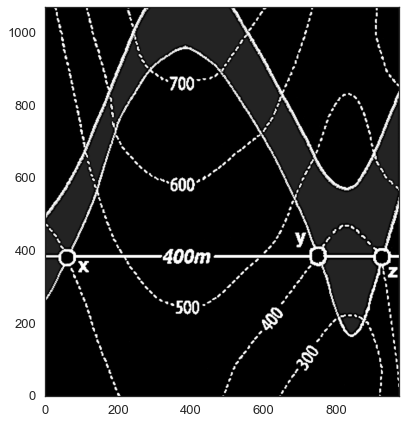

<AxesSubplot:>

In [4]:
from rasterio.plot import show

show(raster)

## Defining GroundControlPoints

Ground control points are used by Rasterio to map a row and column of an image to an x and y (and z) value. We now set the origin to 100,100 and add additional 100 meters to the margins of the raster.

In [5]:
raster.read(1).shape

(1069, 972)

In [6]:
point1 = rasterio.control.GroundControlPoint(row=0, col=0, x=100, y=1169)
point1

GroundControlPoint(row=0, col=0, x=100, y=1169, id='8281849d-0eb4-464b-b99e-536d3d4edd56')

In [7]:
point2 = rasterio.control.GroundControlPoint(row=0, col=972, x=1072, y=1169)
point2

GroundControlPoint(row=0, col=972, x=1072, y=1169, id='6ec1385c-2d33-4614-adc4-07f024878aff')

In [8]:
point3 = rasterio.control.GroundControlPoint(row=1069, col=0, x=100, y=100)
point3

GroundControlPoint(row=1069, col=0, x=100, y=100, id='e3dba004-87c6-4f3b-b30e-4e953d49400c')

In [9]:
point4 = rasterio.control.GroundControlPoint(row=1069, col=972, x=1072, y=100)
point4

GroundControlPoint(row=1069, col=972, x=1072, y=100, id='abd9e2e4-782c-421e-b794-614ab58c74b0')

A list of ground control points is created

In [10]:
points = [point1, point2, point3, point4]
points

[GroundControlPoint(row=0, col=0, x=100, y=1169, id='8281849d-0eb4-464b-b99e-536d3d4edd56'),
 GroundControlPoint(row=0, col=972, x=1072, y=1169, id='6ec1385c-2d33-4614-adc4-07f024878aff'),
 GroundControlPoint(row=1069, col=0, x=100, y=100, id='e3dba004-87c6-4f3b-b30e-4e953d49400c'),
 GroundControlPoint(row=1069, col=972, x=1072, y=100, id='abd9e2e4-782c-421e-b794-614ab58c74b0')]

## Creating Affine Transformation 

An affine transformation is created. The data array can then be saved in the next step.

In [11]:
transformation = rasterio.transform.from_gcps(points)
transformation

Affine(1.0, 0.0, 100.0,
       0.0, -1.0000000000000002, 1169.0000000000005)

## Saving the georeferenced raster

The raster is now saved as new tif file with the dimensions of the data array, the projection, the transformation and the actual data. 

In [12]:
with rasterio.open(
    file_path + 'task1_new.tif',
    'w',
    driver='GTiff',
    height=raster.read(1).shape[0],
    width=raster.read(1).shape[1],
    count=1,
    dtype=raster.read(1).dtype,
    crs='+proj=latlong',
    transform=transformation,
) as dst:
    dst.write(raster.read(1), 1)

## Opening new raster and plotting

The new raster can now be opened as usual.

In [13]:
raster_new = rasterio.open(file_path + 'task1_new.tif')
raster_new

<open DatasetReader name='../../../../gemgis_data/data/48_georeferencing_rasters_using_rasterio/task1_new.tif' mode='r'>

When plotting the raster, it can be seen that the origin is now correctly placed at 100,100 instead of 0,0 as for the original raster. The georeferencing was successful.

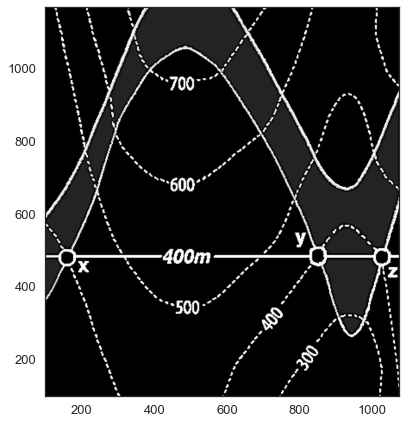

<AxesSubplot:>

In [14]:
from rasterio.plot import show

show(raster_new)